# Capstone Project: King County House Price Predictions
# II. Data Storytelling (EDA)

## Overview
1. <a href='#Section1'>Load packages and data</a>
2. <a href='#Section2'>Univariate analysis</a>
3. <a href='#Section3'>Bivariate analysis</a>
3. <a href='#Section4'>Multivariate analysis</a>
3. <a href='#Section5'>Conclusion</a>

_The dataset was already cleaned in the data wrangling part of this project (see Data wrangling notebook for details)._

<a id= 'Section1'></a>

## 1. Load packages and data

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from pandas.plotting import scatter_matrix
import matplotlib.image as mpimg

In [2]:
# Load the Dataset cleaned and merged in the data wrangling part
df = pd.read_csv('df_house_zipcode.csv', index_col=0)

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view      ...        cost_of_living_score  \
0      5650     1.0           0     0      ...                         2.0   
1      7242     2.0           0     0      ...                         1.7   
2     10000     1.0           0     0      ...                         2.0   
3      5000     1.0           0     0      ...                         2.0   
4      8080     1.0           0     0      ...                         2.0   

   diversity_score  good_for_families_score  health_fitness_score  \
0              4.3                      3.0                   4.0   
1              4.0                      3.7                   4.3   
2              3.7                      4.0                   4.3   
3              3.3                      4.0                   4.0   
4              3.0                      4.3                   4.3   

   housing_score  jobs_score  nightlife_score  outdoor_activities_score  \
0            2.0         2.7              3.7                       4.0   
1            2.0         2.7              4.0                       4.0   
2            3.0         3.3              3.7                       4.0   
3            2.7         3.3              3.0                       4.0   
4            3.3         3.7              2.7                       4.0   

   public_schools_score  weather_score  
0                   3.0            3.0  
1                   3.7            3.0  
2                   4.3            3.0  
3                   3.7            3.0  
4                   4.3            2.7  

[5 rows x 44 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 44 columns):
id                          21597 non-null int64
date                        21597 non-null object
price                       21597 non-null float64
bedrooms                    21597 non-null int64
bathrooms                   21597 non-null float64
sqft_living                 21597 non-null int64
sqft_lot                    21597 non-null int64
floors                      21597 non-null float64
waterfront                  21597 non-null int64
view                        21597 non-null int64
condition                   21597 non-null int64
grade                       21597 non-null int64
sqft_above                  21597 non-null int64
sqft_basement               21597 non-null int64
yr_built                    21597 non-null int64
yr_renovated                21597 non-null int64
zipcode                     21597 non-null int64
lat                         21597 non-null float64


- 21,597 observations (house sales) with 44 features
- The features up to sales_order are house related ones from the main dataset and the features from commute_grade are house location features scrapped from Niche.com using zipcode (see the jupyter notebook of the data wrangling part for more details). 

In [5]:
# Change data types
df.id = df.id.astype(str)
df.zipcode = df.zipcode.astype(str)
df.date = pd.to_datetime(df.date)

In [6]:
type(df.id[0]), type(df.zipcode[0]), type(df.date[0]),

(str, str, pandas._libs.tslib.Timestamp)

In [7]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402029e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.671337e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

           ...        cost_of_living_score  diversity_score  \
count      ...                21597.000000     21597.000000   
mean       ...                    1.862439         3.653887   
std        ...                    0.174469         0.496031   
min        ...                    1.700000         2.700000   
25%        ...                    1.700000         3.300000   
50%        ...                    1.700000         3.700000   
75%        ...                    2.000000         4.000000   
max        ...                    2.300000         4.300000   

       good_for_families_score  health_fitness_score  housing_score  \
count             21597.000000          21597.000000   21597.000000   
mean                  3.776344              4.201894       2.329837   
std                   0.470023              0.159727       0.423887   
min                   2.700000              3.300000       1.300000   
25%                   3.300000              4.000000       2.000000   
50%                   4.000000              4.300000       2.300000   
75%                   4.000000              4.300000       2.700000   
max                   4.300000              4.300000       3.300000   

         jobs_score  nightlife_score  outdoor_activities_score  \
count  21597.000000     21597.000000              21597.000000   
mean       3.009668         3.670033                  4.047178   
std        0.434868         0.497565                  0.176452   
min        2.000000         1.700000                  3.000000   
25%        2.700000         3.300000                  4.000000   
50%        3.000000         3.700000                  4.000000   
75%        3.300000         4.000000                  4.000000   
max        3.700000         4.300000                  4.300000   

       public_schools_score  weather_score  
count          21597.000000   21597.000000  
mean               3.702496       2.832296  
std                0.569804       0.342803  
min                2.300000       1.700000  
25%                3.300000       3.000000  
50%                4.000000       3.000000  
75%                4.300000       3.000000  
max                4.300000       3.000000  

[8 rows x 30 columns]

The dataframe wrangled in the previous notebook is now loaded exactly as it was. 

<a id= 'Section2'></a>

## 2. Univariate analysis

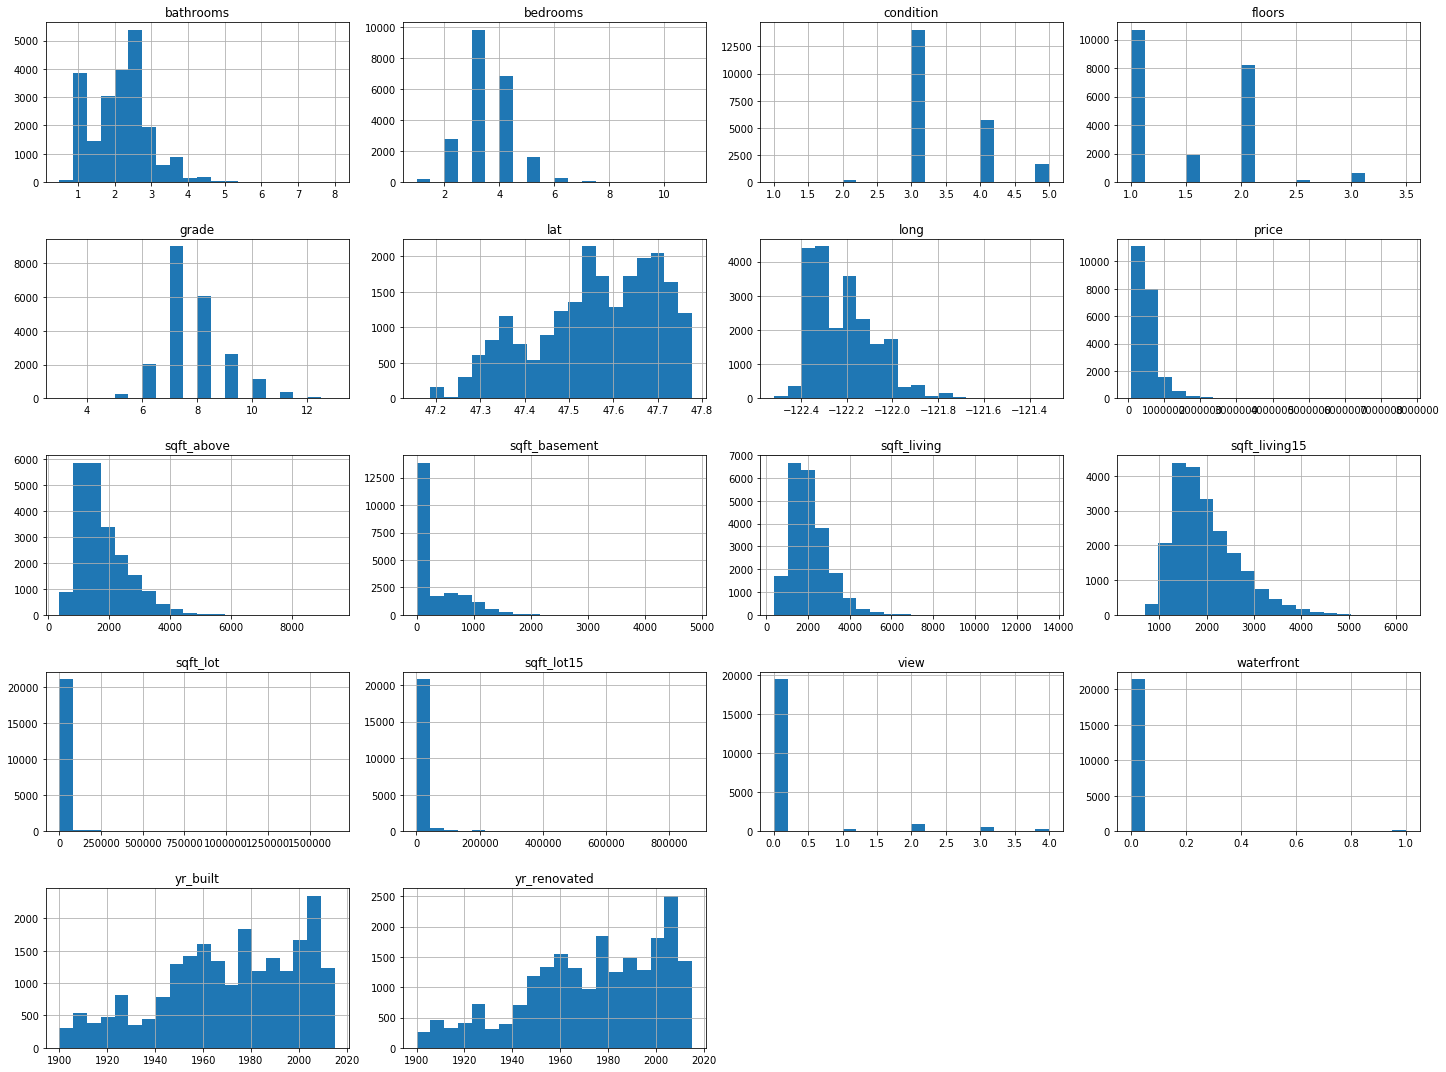

In [8]:
# matplotlib histogram
df.iloc[:,:21].hist(bins=20, figsize=(20,15))
plt.tight_layout() # need for savefig
plt.savefig("histograms.png",format="png", dpi=300)
plt.show()

- I looked into histograms of all house features (excluding zipcode features). Some histograms show a count of each possible value if a feature has only a few possible values (e.g., bedrooms, bathrooms, grade, etc). I already looked into each feature in the data wrangling section to take care of outliers and missing values.
- The main feature of interest is the column named 'price' which represents house prices in King County between May 2014 and May 2015. My main quesiton is "What are the features that can help predicting house prices?". I will investigate relationships between features to answer this question.

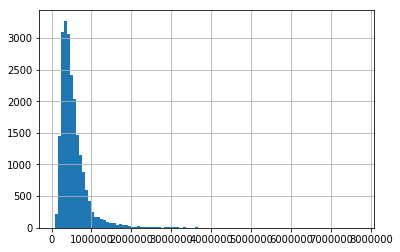

In [10]:
# histogram
df.price.hist(bins=100)
plt.show()

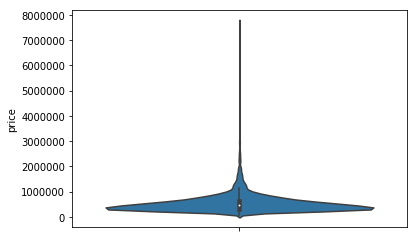

In [11]:
# violin plot
sns.violinplot(y=df.price)
plt.show()

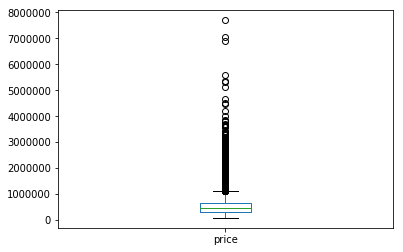

In [12]:
# box plot
df.price.plot(kind='box')
plt.show()

All these three plots show the distribution of house prices. The house price is highly skewed to the right. There are also many other right-skewed features such as bedrooms, bathrooms, square footage related features starting with 'sqft_'. These are all likely to be positively correlated with house prices. Now I will look into relationships between features.

In [13]:
# sqft_living =  sqft_above + sqft_basement ? 
sum(df.sqft_living - df.sqft_above - df.sqft_basement == 0)

21597

In [14]:
# number of houses without basement
sum(df.sqft_basement == 0)

13110

The feature sqft_living is the sum of sqft_above and sqft_basement and a lot of house (13110 out of 21597) do not have a basement.

<a id= 'Section3'></a>

## 3. Bivariate analysis

Scatter plots are drawn to see the overall relationships between features. 

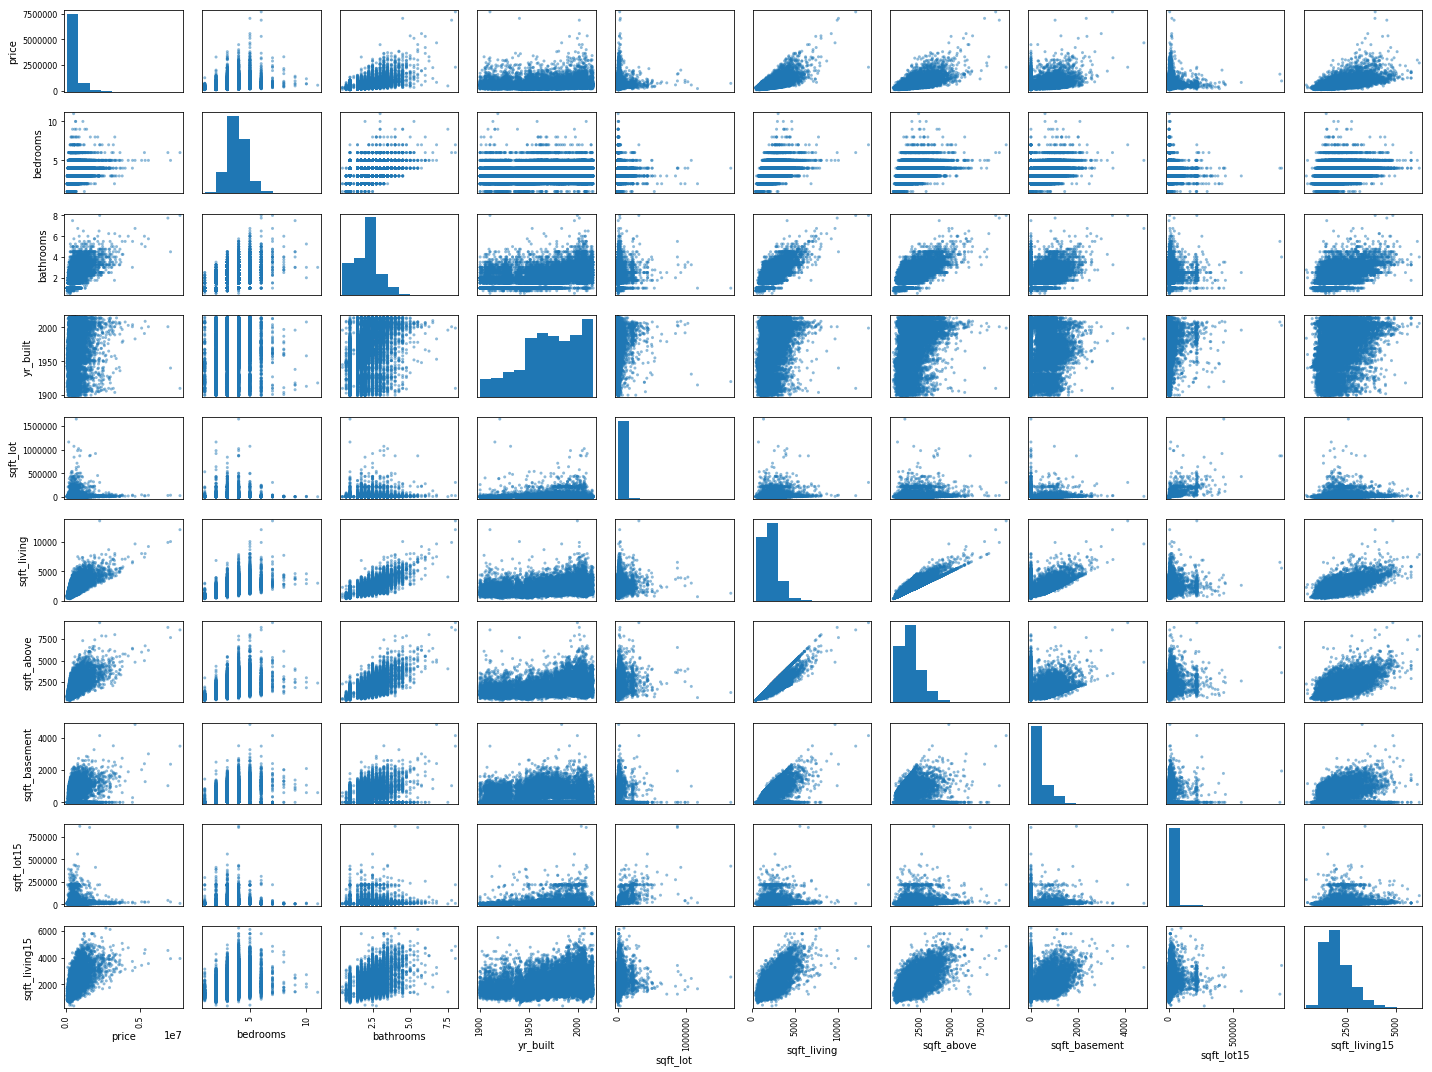

In [12]:
columns_for_scatter =['price', 'bedrooms', 'bathrooms', 'yr_built', 
                      'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement',   
                      'sqft_lot15', 'sqft_living15']
scatter_matrix(df[columns_for_scatter], figsize = (20,15))
plt.tight_layout() # need for savefig
plt.savefig("scatter.png",format="png", dpi=300)
plt.show()

- Since there are so many columns, I omitted the columns with a few possible values. I will investigate those columns later using box plots. 
- The first row shows that many features (e.g., bathrooms and sqft_living) are correlated with house prices. 
- Some variables other than price are also correlated with each other. I will further check their correlations using the correlation coefficient below.

In [16]:
# Correlation matrix
corr_matrix = df.corr()

This correlation matrix can be represented as a heat map which helps detections of low and high correlations.

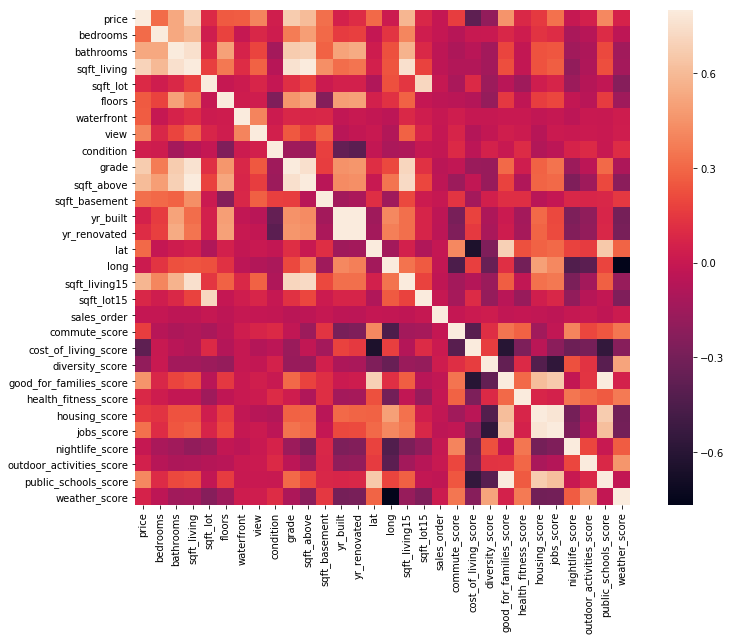

In [17]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
plt.tight_layout() # need for savefig
plt.savefig("corr_heat_map.png",format="png", dpi=300)
plt.show()

- The brighter box means the two features intersecting in the box are highly correlated. Too high correlation coefficient between two predictors (independent variables) used in the same model can introduce multicolinearity. For example, sqft_above and sqfr_living has a very bright box (correlation=.88). These will have to be carefully taken care of when building a model. If I choose to use a model that assumes no multicolinearity later, I will remove some redundant features or use principan component analysis (PCA).   
- The first row shows correlations between price, the main feature of interes, and other features. It has many bright boxes and I will look into these using correlation coefficients between price and other features in descending order (below). 

In [18]:
corr_matrix['price'].sort_values(ascending=False)

price                       1.000000
sqft_living                 0.701909
grade                       0.667922
sqft_above                  0.605371
sqft_living15               0.585247
bathrooms                   0.525905
good_for_families_score     0.454418
public_schools_score        0.411547
view                        0.397318
jobs_score                  0.331647
sqft_basement               0.323776
bedrooms                    0.315960
lat                         0.306777
waterfront                  0.266437
floors                      0.256814
commute_score               0.168691
housing_score               0.155732
yr_renovated                0.105734
sqft_lot                    0.089882
health_fitness_score        0.088650
sqft_lot15                  0.082837
weather_score               0.063249
yr_built                    0.053984
outdoor_activities_score    0.047585
condition                   0.036025
long                        0.022092
nightlife_score            -0.003632
s

- The features related to living area inside a house are highly or moderately correlated with price. The column sqft_living and grade have the 2 highest correlations to price. The size of lot has very low correlation with house price (.09).
- The number of bathrooms is much more important than the number of bedrooms in house prices (.53 vs .32) 
- The house location features such as good_for_families_score (.45), public_schools_score (.41) and job_score (.33) are moderately correlated with house price. The latitude is also correlated with price (.31).
- yr_renovated is twice more correlated to price than yr_built. Thus, yr_renovated should be included in a model if one of them has to be dropped due to multicolinearity (Note that 96% of renovated years are actually built years. See the data wrangling part for more details). 

Some other features with some interesting bright or dark boxes in the correlation heat map are also further investigated with correlation coefficients here.

In [19]:
# Make a function that outputs correlated features in order
def find_strong_corr_features(matrix, feature, cut):
    return matrix[feature][(matrix[feature] >=cut) | (matrix[feature]<=-cut)].sort_values(ascending=False)

In [20]:
find_strong_corr_features(corr_matrix, 'grade', .3)

grade                      1.000000
sqft_living                0.762779
sqft_above                 0.756073
sqft_living15              0.713867
price                      0.667922
bathrooms                  0.665838
yr_renovated               0.461655
floors                     0.458794
yr_built                   0.447865
bedrooms                   0.366181
jobs_score                 0.336988
good_for_families_score    0.308978
public_schools_score       0.304281
Name: grade, dtype: float64

House grade is correlated with many of both inside house and location features. It is also moderately correlated with year built and renovated.

In [21]:
find_strong_corr_features(corr_matrix, 'lat', .3)

lat                        1.000000
good_for_families_score    0.683791
public_schools_score       0.658959
commute_score              0.413987
jobs_score                 0.308743
price                      0.306777
cost_of_living_score      -0.649223
Name: lat, dtype: float64

Latitude of a hosue is correlated with house location features derived from zipcode. This will be further investigated with year built and maps.

In [22]:
find_strong_corr_features(corr_matrix, 'good_for_families_score', .3)

good_for_families_score    1.000000
public_schools_score       0.913268
lat                        0.683791
jobs_score                 0.661835
housing_score              0.614571
price                      0.454418
commute_score              0.342416
grade                      0.308978
health_fitness_score       0.304860
diversity_score           -0.367665
cost_of_living_score      -0.604697
Name: good_for_families_score, dtype: float64

- This shows good areas for families have good public schools (corr = .91). 
- The good_for_families_score feature is also correlated with other house location features. 
- It is negatively correlated with diversity and cost of living scores. This shows the better house location for families has lower diversity and higher cost of living.
- Good houses for families tend to be located in higher latitude in King County.

In [23]:
find_strong_corr_features(corr_matrix, 'housing_score', .3)

housing_score              1.000000
jobs_score                 0.773409
public_schools_score       0.667443
good_for_families_score    0.614571
long                       0.497903
sqft_living15              0.331777
yr_built                   0.308292
nightlife_score           -0.301418
weather_score             -0.314111
diversity_score           -0.428886
Name: housing_score, dtype: float64

- Housing scores are highly correlated with many other location scores. 
- Housing scores tend to be higher for higher longitude and worse weather (meaning the east of King County?)
- Housing scores are negatively correlated with diversity scores.

In [24]:
# find highly correated indep variable pairs
corr_indep = pd.DataFrame()
for i, col in enumerate(corr_matrix.index):
    for j, idx in enumerate(corr_matrix.index):
        if i > j:
            corr = corr_matrix.loc[idx,col]
            if  (corr >= .5) | (corr <= -.5):
                corr_indep.loc[idx+'_vs_'+col, 'corr'] = round(corr,4)

print(corr_indep.sort_values(by=['corr'], ascending=False))

                                                   corr
good_for_families_score_vs_public_schools_score  0.9133
yr_built_vs_yr_renovated                         0.9099
sqft_living_vs_sqft_above                        0.8764
housing_score_vs_jobs_score                      0.7734
sqft_living_vs_grade                             0.7628
sqft_living_vs_sqft_living15                     0.7564
grade_vs_sqft_above                              0.7561
bathrooms_vs_sqft_living                         0.7558
sqft_above_vs_sqft_living15                      0.7318
sqft_lot_vs_sqft_lot15                           0.7182
grade_vs_sqft_living15                           0.7139
price_vs_sqft_living                             0.7019
bathrooms_vs_sqft_above                          0.6867
lat_vs_good_for_families_score                   0.6838
price_vs_grade                                   0.6679
housing_score_vs_public_schools_score            0.6674
bathrooms_vs_grade                              

The above are all highly correlated independent variables in order.

It was found that the yr_built feature is very weakly correlated with house prices above (.05) and I wondered why older houses do not tend to be cheaper. Now I will investigate the relationship between house prices and built years further.

### Plots for year built on the x-axis

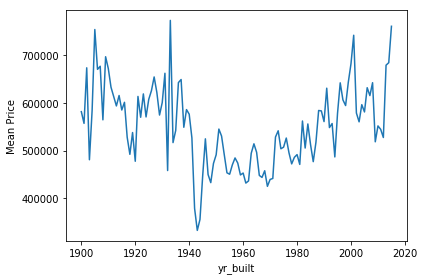

In [25]:
# mean prices as a function of year renovated
df.groupby('yr_built')['price'].mean().plot()
plt.ylabel('Mean Price')
plt.tight_layout() # need for savefig
plt.savefig("MeanPrice_VS_YearBuilt.png",format="png", dpi=300)
plt.show()

- There are a lot of fluctuations year to year. If those fluctuations are ignored, we can see the overall v-shape pattern. In ther words, house prices tend to go down as houses get older from 2015 to 1960, but prices tend to go back up as they get even more older from around 1960 to 1900. Now I found out why house prices are so weakly correlated with built years, but still wonder what makes this pattern. Thus, more features will be plotted as a function of year built.
- Note that the y-axis (here price) is from aggregated values using mean since there are more than one observations for each year built. I prefer median as an aggregation method for skewed features like price since median is less affected by outliers than mean for those features. However, mean was chosen for aggregation since with median it is more difficult to see a pattern if the y-axis is a feature with a few possible values (this will be mostly the case). For the price vs. yr_built plot, mean and median anyway showed the similar pattern. 

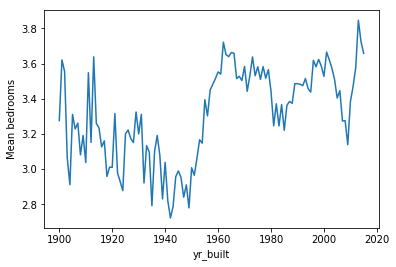

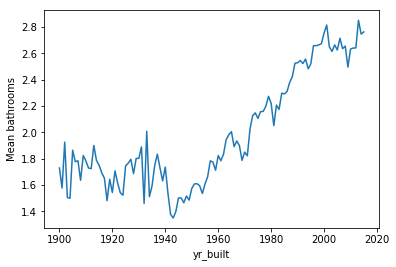

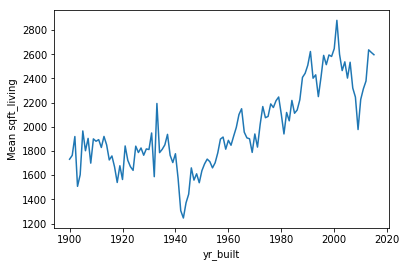

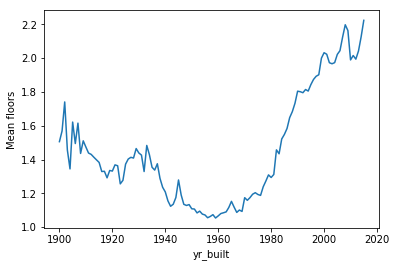

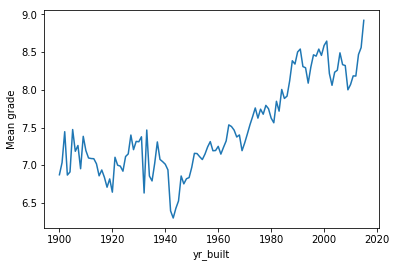

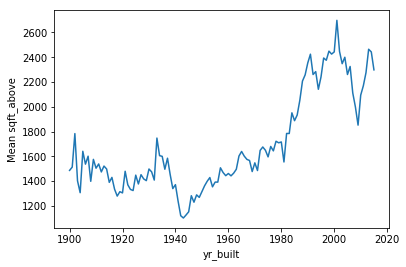

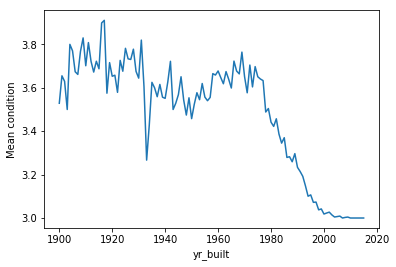

In [26]:
# interesting house features vs. year built
for column in ['bedrooms', 'bathrooms', 'sqft_living',
               'floors', 'grade','sqft_above', 'condition']:
    df.groupby('yr_built')[column].mean().plot()
    plt.ylabel('Mean '+column)
    plt.show()

- I tried all numeric columns, but I first left only interesting house features above. They (except for last one, condition) have similar v-shape patterns, but the patterns were more likely a check mark instead of V. It seems the houses built before 1950 have reasons to be still around without getting teared down yet. Their values for 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', and 'sqft_above' tend to go back up as they get older. 
- The last plot is more interesting; it shows house conditions tend to be better for older houses. 
- All of these features can add up to the v-shape pattern in the plot for house price vs year built.

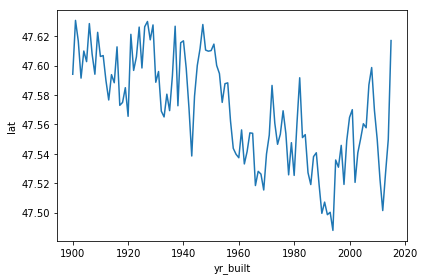

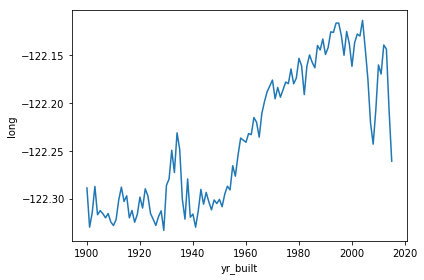

In [16]:
# latitude and longitude vs yr_built
for column in ['lat', 'long']:
    df.groupby('yr_built')[column].mean().plot()
    plt.ylabel(column)
    plt.tight_layout() # need for savefig
    plt.savefig(str(column)+"_yr_built.png",format="png", dpi=300)
    plt.show()

- Latitude tends to decrease and longitude tends to increase as year built increases. I think the patterns show how the Seattle metropolitan area has expanded from Seattle to the east and south suburb cities since 1900. Note that the north and west bound of Seattle does not belong to King County as you can see in the below map. 
- The King County map image 'King_County_border.png' was cropped from OpenStreetMap (Link: https://www.openstreetmap.org/relation/1153346 )

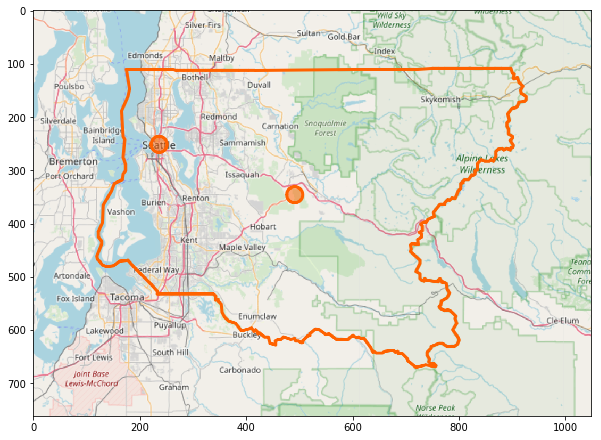

In [28]:
King_County_border = mpimg.imread('King_County_border.png')
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(King_County_border)
plt.show()

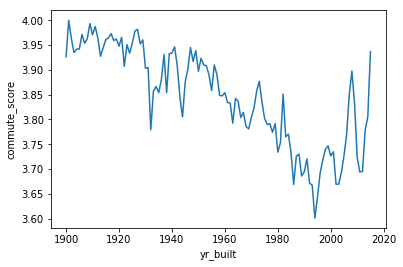

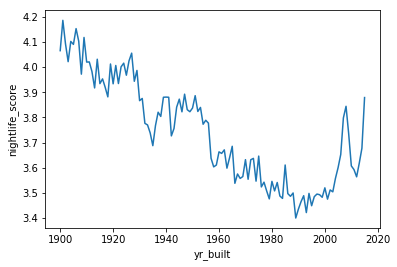

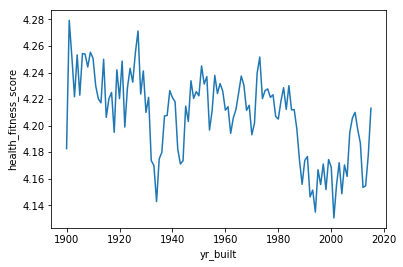

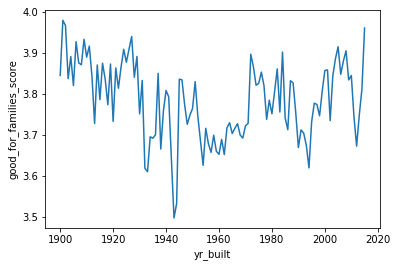

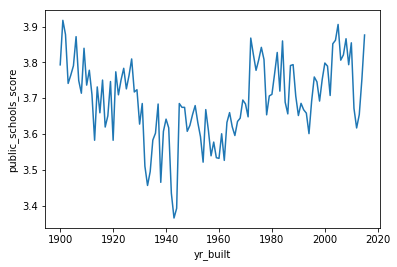

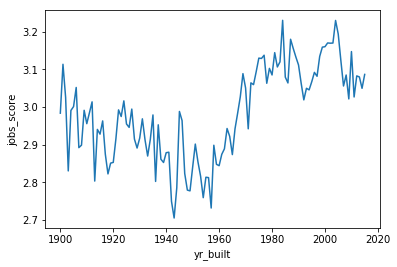

In [29]:
# interesting house location (zipcode) features vs year built
for column in ['commute_score', 'nightlife_score', 'health_fitness_score',
               'good_for_families_score', 'public_schools_score', 'jobs_score']:
    df.groupby('yr_built')[column].mean().plot()
    plt.ylabel(column)
    plt.show()

The y-axis' are the features related house locations and I only left features showing interesting patterns. I see 2 interesting types of patterns, one pattern in the first three plots and the other pattern in the last three.
- 'commute_score', 'nightlife_score', 'health_fitness_score': These tend to decrease over time since 1900, but increase after 2000. This pattern is possibly due to the dispersion of Seattle just like the pattern found in latitude and longitude.
- 'good_for_families_score', 'public_schools_score', 'jobs_score': These features tend to decrease till around 1960 and then increase again. This pattern is similar to the v-shape found in the house price vs. year built plot. This pattern could explain why those old houses built before 1960 are more expensive if they are older!! These features could be good predictors that can explain some variabilities in house prices. 

### Bivariate analysis for features with a few levels

It is time to investigate relationships between price and the features with a few levels of values. Some features such as  'bedrooms' and 'bathrooms' are included here again since they have small enough levels of values for box plots.

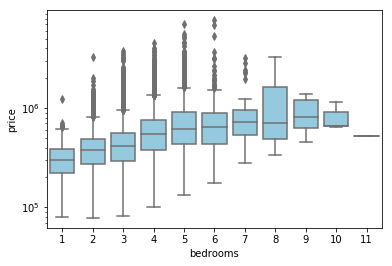

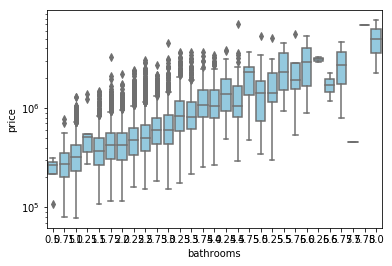

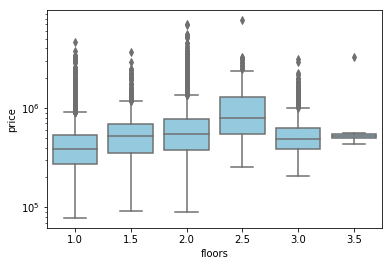

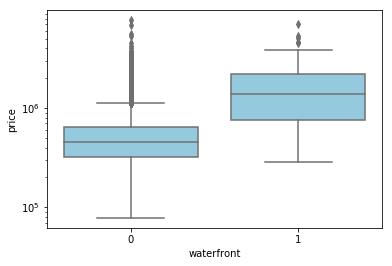

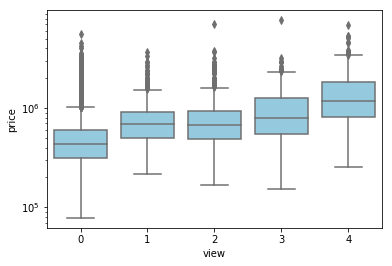

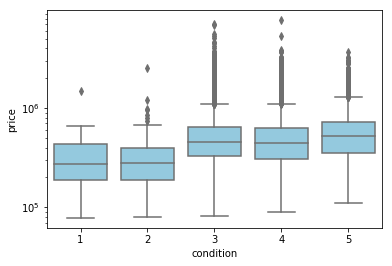

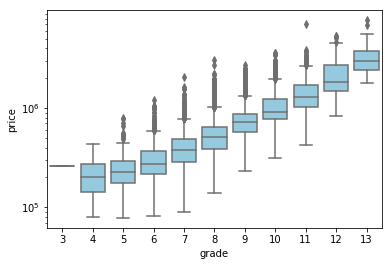

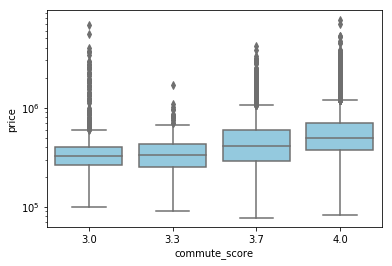

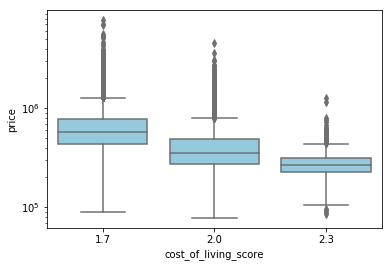

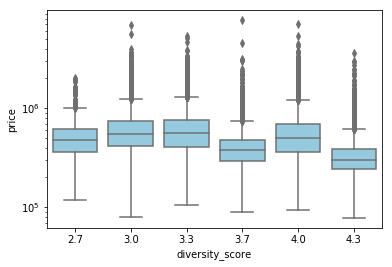

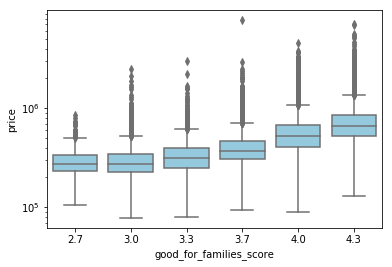

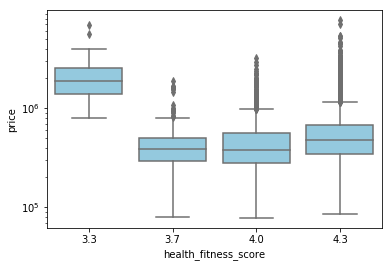

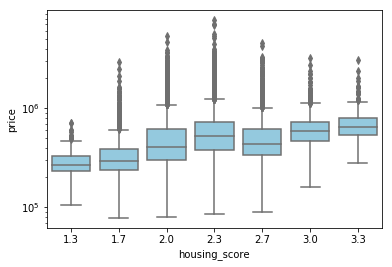

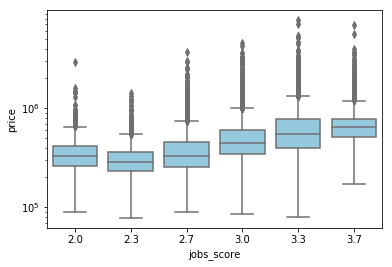

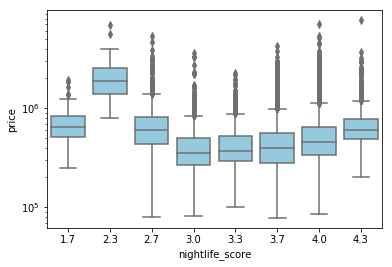

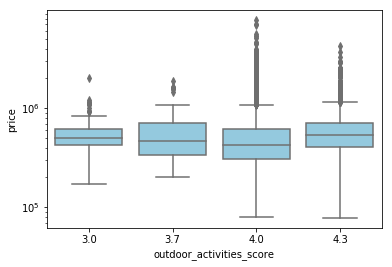

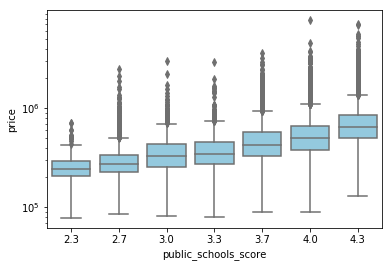

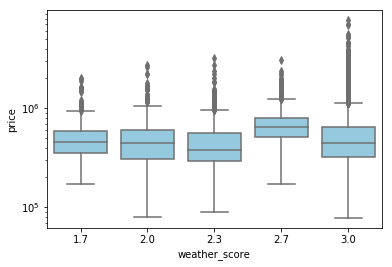

In [30]:
# Price box plots with discrete features on x-axis 
columns_discrete = ['bedrooms','bathrooms','floors', 'waterfront', 
                    'view', 'condition', 'grade',
                    'commute_score', 'cost_of_living_score', 
                    'diversity_score', 'good_for_families_score', 
                    'health_fitness_score', 'housing_score', 'jobs_score',
                    'nightlife_score', 'outdoor_activities_score', 
                    'public_schools_score', 'weather_score']
for column in columns_discrete:
    g = sns.boxplot(x=column, y='price', data = df, color="skyblue")
    g.set_yscale('log') #needed this due to skewed prices
    plt.show()

- Since house prices were extremely right-skewed, y-axis (price) was log scaled to see the differences between side-by-side boxes better. 
- The boxes of many features are monotonic increasing or decreasing. Thus, these features could become good predictors in the prediction of house prices. 'grade', 'bathrooms', 'good_for_families_score', and 'public_schools_score' are particularly showing stable monotonic relationships with house prices. This result was expected!! (The line plots of these features with year built on the x-axis had a v-shape similarly to the plot of price vs. year built.) This finding is confirmed below by correlation coefficients. The correlation coefficients of these 4 features to house prices are the highest four. 
- Some of the features are not monotonic, but show distinct differences in prices between different levels. For example, houses with the lowest level of health_fitness_score have much higher house prices than houses with other levels. In machine learning, this kind of features would be better to be used with one hot encoding to treat them as a categorical variable without order.

In [31]:
# Correlations with price
corr_matrix_discrete = df[['price']+columns_discrete].corr()
find_strong_corr_features(corr_matrix_discrete, 'price', .3)

price                      1.000000
grade                      0.667922
bathrooms                  0.525905
good_for_families_score    0.454418
public_schools_score       0.411547
view                       0.397318
jobs_score                 0.331647
bedrooms                   0.315960
cost_of_living_score      -0.384407
Name: price, dtype: float64

### Time-series analysis

How times of the year impact housing prices? Some time series analyses were done using house prices and dates sold.   

In [32]:
#Counter(df.date)

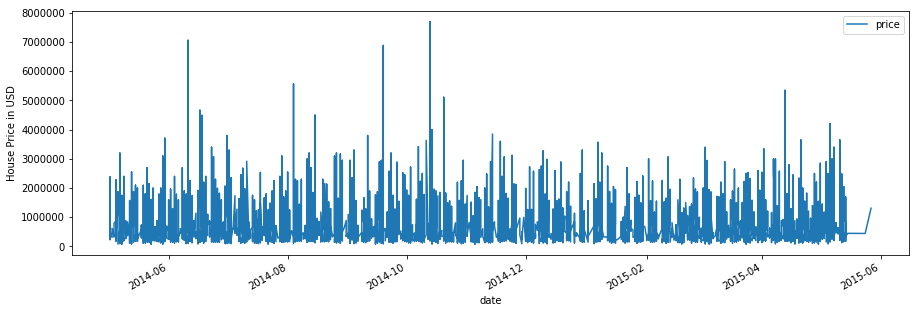

In [33]:
# all house prices ordered by sold dates
df[['date','price']].set_index('date').plot(figsize=(15,5))
plt.ylabel('House Price in USD')
#plt.yscale('log') # this doesn't help
plt.show()

The above graph shows house prices of all sales. It is hard to find any pattern due to too many values, so I will use aggregated values below. Median was used for aggregation due to outliers in prices. 

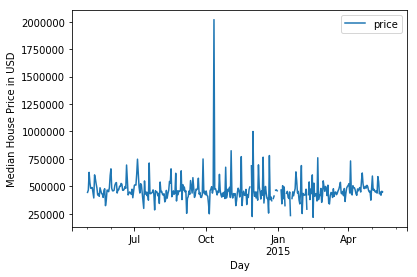

In [34]:
# Resample prices by day using median
df[['date','price']].set_index('date').resample('D').median().plot()
# plt.yscale('log') # this doesn't help
plt.xlabel('Day')
plt.ylabel('Median House Price in USD')
plt.show()

It is still hard to the pattern. Log scaling y-axis does not help. Thus, I will use aggregated prices for longer periods (week and month).

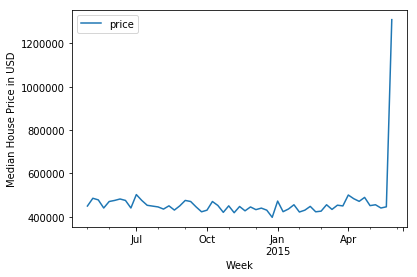

In [35]:
# Resample prices by week using median
df[['date','price']].set_index('date').resample('W').median().plot()
# plt.yscale('log') # this doesn't help
plt.xlabel('Week')
plt.ylabel('Median House Price in USD')
plt.show()

In [36]:
df[['date','price']].set_index('date').resample('W').median().iloc[-1]

price    1310000.0
Name: 2015-05-31 00:00:00, dtype: float64

In [37]:
df[['date','price']].set_index('date').resample('W').count().iloc[-1]

price    1
Name: 2015-05-31 00:00:00, dtype: int64

The extreme outliers are usually not shown in these median graphs aggregating enough number of values, but there was only 1 observation in the very last week and it was a extremely expensive house. Since the extrem price prevented the overall pattern from being shown and log scaling y-axis does not help., I omitted the price in the below graph.   

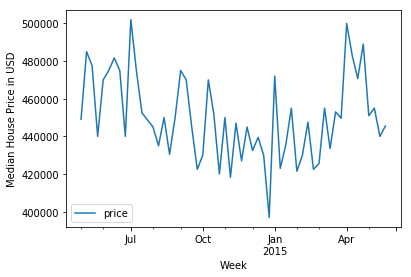

In [38]:
# Resample prices by week using median (one outlier omitted)
df[['date','price']].set_index('date').resample('W').median()[:-1].plot() # last price removed
plt.xlabel('Week')
plt.ylabel('Median House Price in USD')
plt.show()

Now the graph starts showing a v-shape pattern. By ignoring the fluctuations, I can see the price goes down from May to January and then goes back up till April (or May)

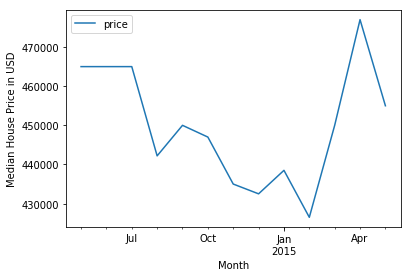

In [40]:
# Resample prices by month using median
df[['date','price']].set_index('date').resample('M').median().plot()
plt.xlabel('Month')
plt.ylabel('Median House Price in USD')
plt.show()

The pattern I saw above is more clear when monthly median prices are used.

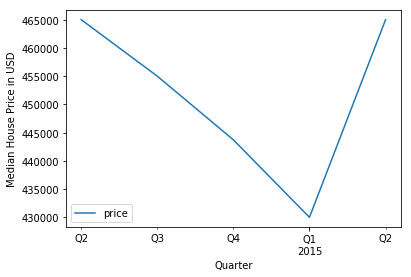

In [37]:
# Resample prices by quarter using median
df[['date','price']].set_index('date').resample('3M').median().plot()
plt.xlabel('Quarter')
plt.ylabel('Median House Price in USD')
plt.show()

The quarterly aggreated median prices show an exact v-shape pattern.

<a id= 'Section4'></a>

## 4. Multivariate analysis

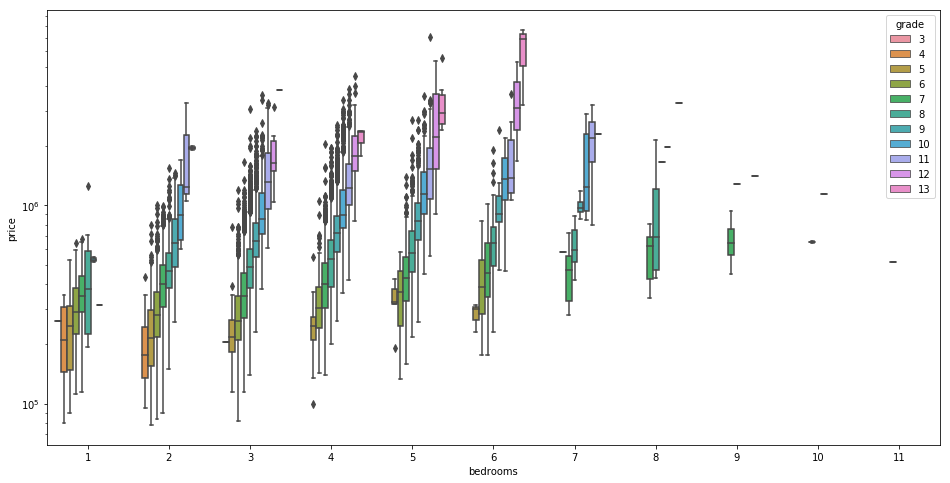

In [38]:
# Box plots of Price for each bedroom count and house grade  
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='bedrooms', y='price', hue='grade',#showfliers=False,
            data=df)
ax.set_yscale('log') #needed this due to skewed prices
plt.show()

- This multivariate box plot consists of price boxes for each bedroom count and house grade. This shows (1) how prices go up as the number of bedrooms increases and (2) how prices go up as house grade increases for each bedroom count. This plot shows house grade explains extra variabilities in house prices not explained by the number of bedrooms. Thus, they together will be good predictors in a model predicting house prices. 
- Another interesting pattern I found here is as the house price does not keep going up as the number bedrooms increases. After around 6 bedrooms, prices tend to go down as the bedroom count increases since high grade houses disappear.

Since the dataset has latitude and longtitude of houses, we can draw houses on a map with colors for some features of interest. We can visualize where are expensive houses, good public schools, and old houses, etc. 

### Analysis using maps

In [39]:
# minimum and maximum longitude and latitude (need these to crop the map area I need)
long_lat_min_max =[min(df.long), max(df.long), min(df.lat), max(df.lat)]
long_lat_min_max

[-122.519, -121.315, 47.1559, 47.7776]

The map image 'King_County_map.png' was cropped from OpenStreetMap using above latitude and longitude maximum and minimum. Link:  https://www.openstreetmap.org/export#map=9/47.4709/-121.9175

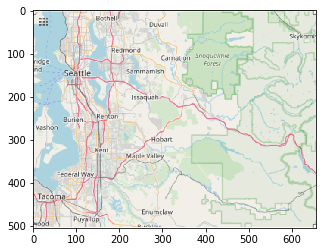

In [40]:
King_County_map = mpimg.imread('King_County_map.png')
#fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(King_County_map)
plt.show()

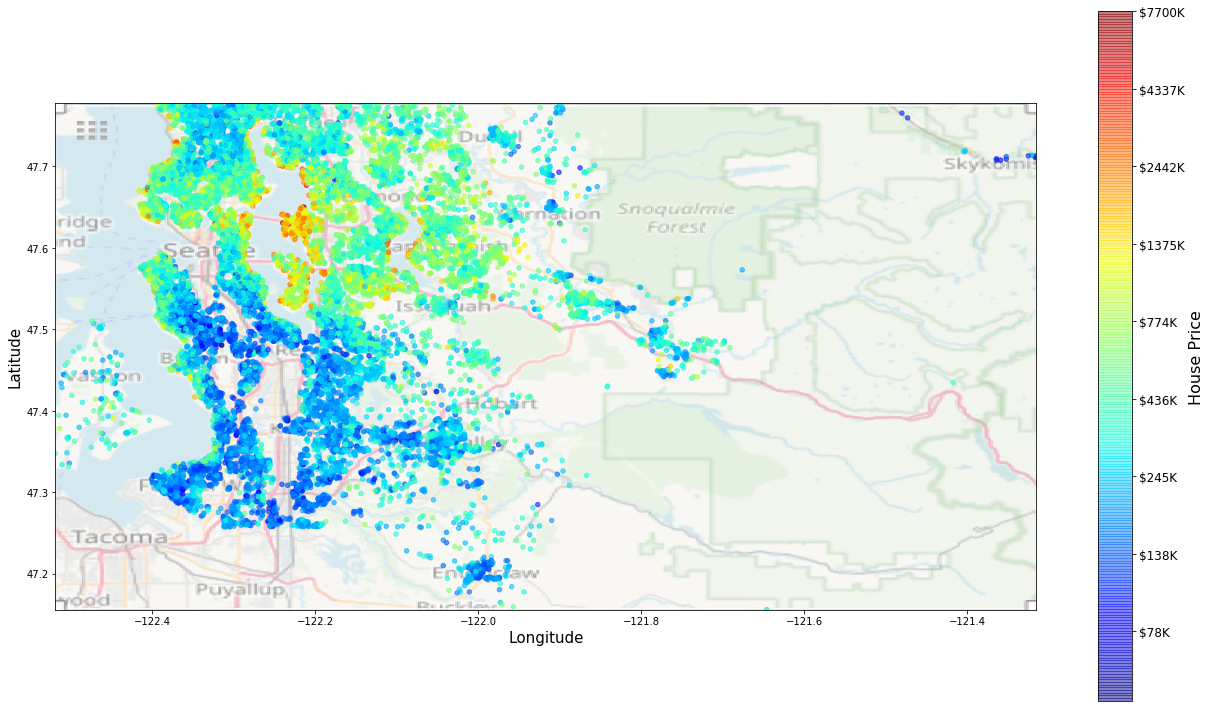

In [41]:
# load the map
King_County_map = mpimg.imread('King_County_map.png')

# scatter plot of longitude and latitude colored with price
ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' '], label=' ', # used for dot size
    c=np.log(df.price), cmap=plt.get_cmap('jet'), colorbar=False,
    figsize=(18,10), sharex=False)

# show the map image with correct longitude and latitude
plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

# need a separate colorbar due to log scaled prices
cbar = plt.colorbar()
ticks = np.linspace(np.log(df.price).min(), np.log(df.price).max(), 9)
ticks_label = ["$%dK"%(np.exp(v)/1000) for v in ticks]
#cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels(ticks_label, fontsize=12)
cbar.set_label('House Price', fontsize=16)

plt.tight_layout() # need for savefig
plt.savefig("Price_map.png",format="png", dpi=300)

plt.show()

- This graph shows where how house prices are distributed on the map. I had to log-scale house prices since otherwise the dots are all blue with a few red dots due to right-skewed house prices. 
- This shows houses near Lake Washington (the largest lake on the map, adjacent to Seattle) and east and west sides of the lake tend to be more expensive than other areas. In other words, the map shows inexpensive houses (blue) are mostly in the south of King county. This explains why latitude of a house is positively correlated with a house price (found in Section 2) 
- There are also some inexpensive houses in the east of King county
- This graph also shows that the extremely expensive houses (red and orange) are on the waterfront.

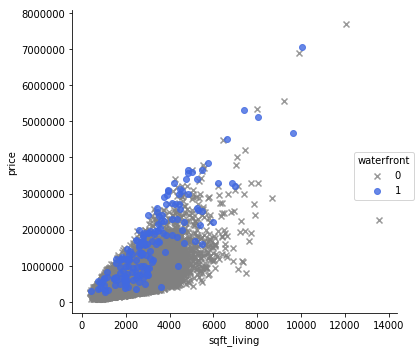

In [13]:
# sqft_living vs price scatter plot colored with waterfront 
sns.lmplot(data = df, x='sqft_living', y='price', hue='waterfront', hue_order=[0,1],
           fit_reg=False, markers=["x", "o"], palette={1:"royalblue", 0:"grey"})
plt.tight_layout() # need for savefig
plt.savefig("price_sqft_living_colored_waterfront.png",format="png", dpi=300)
plt.show()

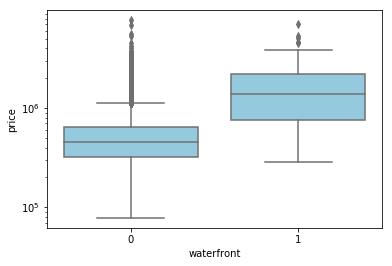

In [43]:
g = sns.boxplot(x='waterfront', y='price', data = df, color="skyblue")
g.set_yscale('log') #needed this due to skewed prices
plt.show()

The scatter plot and box plot show houses on the waterfront (blue circles) indeed tend to be more expensive.

Zipcode features that are the most correlated with prices were found to be good_for_families_score and public_schools_score. Thus, I colored the dots with those scores to see if a similar pattern can be found.

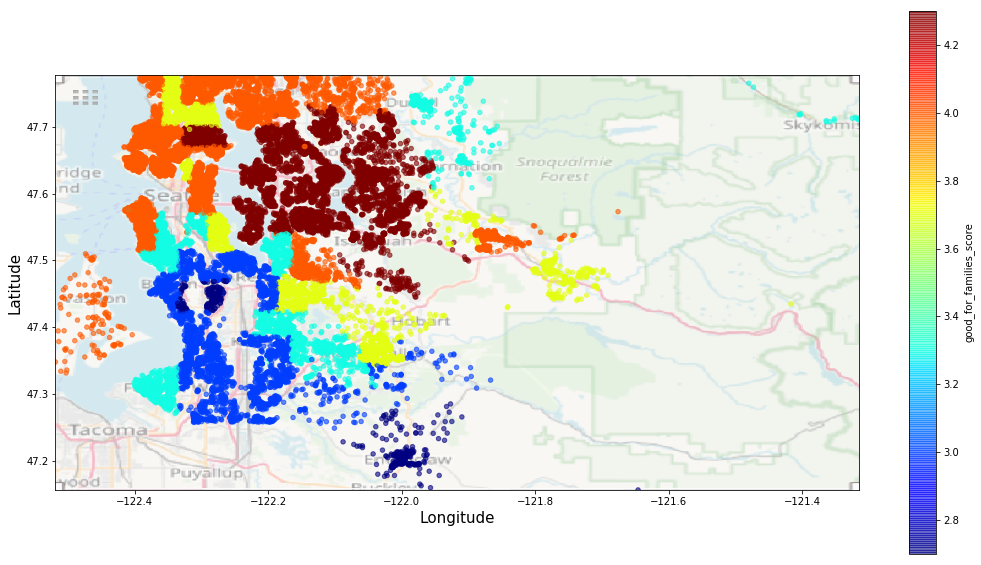

In [44]:
# colored with good_for_families_score

ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' ']/100, label=' ', 
    c='good_for_families_score', cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(18,10), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.show()

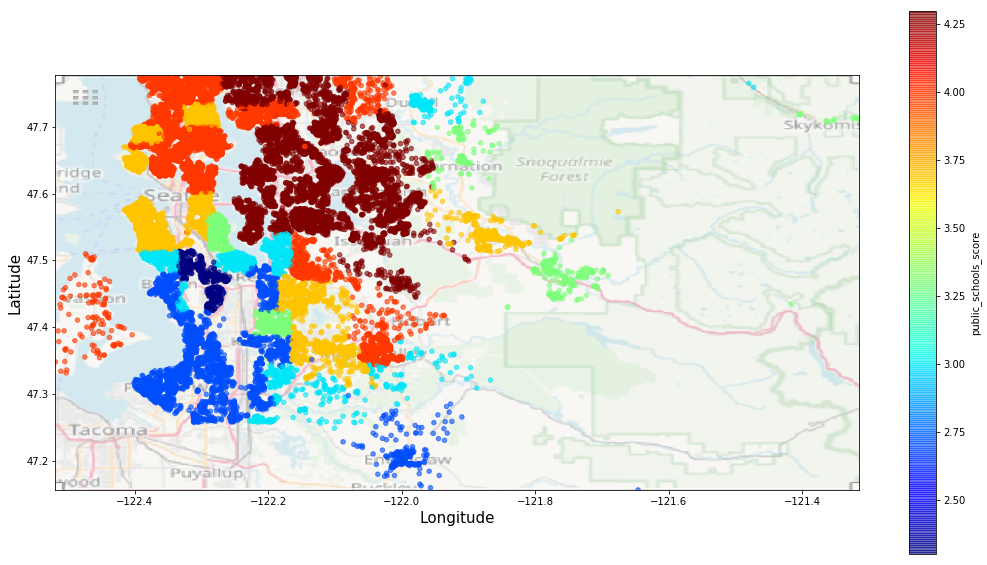

In [45]:
# colored with public_schools_score

ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' ']/100, label=' ', 
    c='public_schools_score', cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(18,10), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.show()

- Note that these zipcode features were scrapped using zipcode, so these graphs cannot show different scores within the same zipcode. However, they still show similar color patterns, more red houses on the west and east of Lake Washington and blue houses below the lake. 
- These graphs confirm again that the features such as good_for_families_score and public_schools_score could become a good predictor for house prices.  

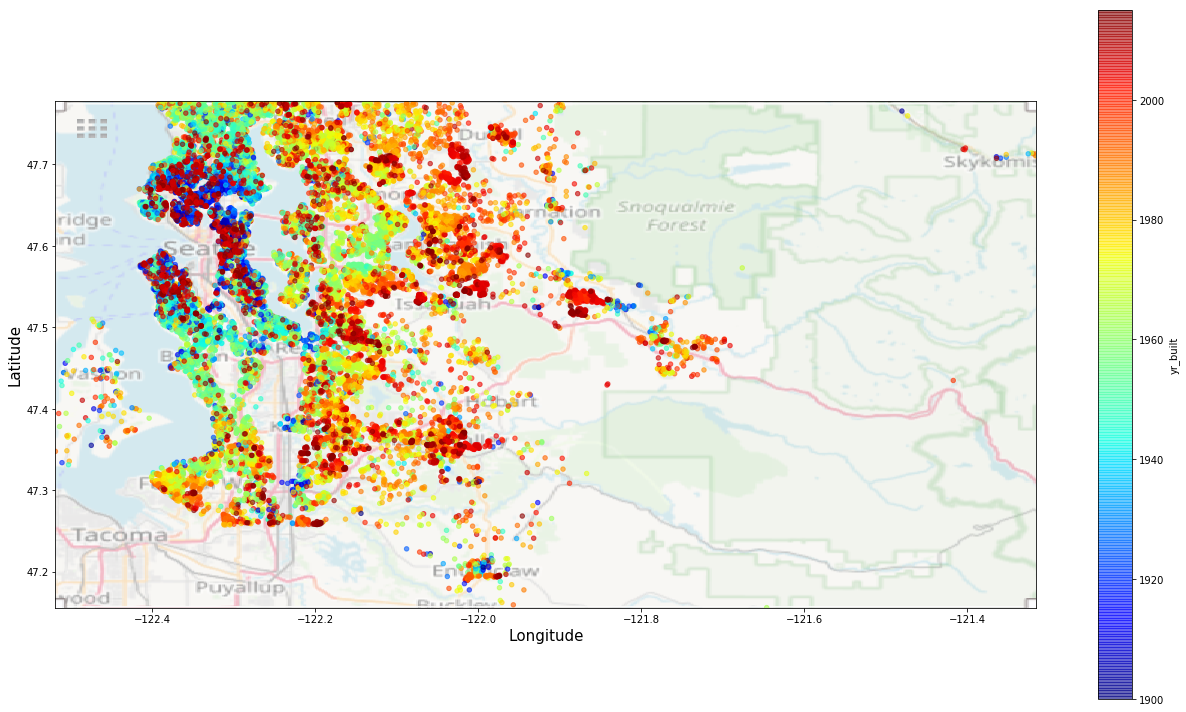

In [46]:
# colored with yr_built

ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' ']/100, label=' ', 
    c='yr_built', cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(18,10), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.tight_layout() # need for savefig
plt.savefig("BuiltYear_map.png",format="png", dpi=300)

plt.show()

- Red dots are newer and blue dots are older houses. 
- Blue (very old) houses are mostly concentrated in Seattle
- Yellow and orange houses (relatively new around 1970 to 2000) are dispersed to the east and south of Seattle.
- Red (very new) houses are everywhere including Seattle in King county. 
- These findings are very consistent with what I found using the line graphs of 'latitude', 'longitude', 'commute_score', 'nightlife_score', and 'health_fitness_score' with year built on the x-axis.

<a id= 'Section5'></a>

## 5. Conclusion

The dataset contained 21,597 observations (house sales) each with 44 features. I did univariate, bivariate and multivariate analyses. The followings are the summary of what I found the most interesting through the analyses.

1. What are the features correlated with house prices?
<img src="corr_heat_map.png" width="500">
 - The features related to house living space including sqft_living, grade, and bathrooms are highly or moderately correlated with house prices. The square footage of home is the most correlated with a house price. The number of bathrooms is much more correlated with a house price than the number of bedrooms. 
 - The house location features such as good_for_families_score, public_schools_score, and job_score correlate moderately with a house price. The latitude is also correlated with price.
 
2. Why are the built years not correlated with house prices (corr=0.05)? 
<img src="MeanPrice_VS_YearBuilt.png" width="400">
I found an interesting pattern in the plot of house price vs. year built. The mean or median house prices tend to be lower for older houses if they were built between 1960 to 2015 (as expected). However, prices tend to be higher for older houses if they were built between 1900 and 1960. Through further analysis, I found 2 possible reasons that can add up to the pattern. 
 - Plots of 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'good_for_families_score', 'public_schools_score', and 'jobs_score' as a function of year built have the similar pattern. They have lower values for older houses from built year 2015 to 1960, but tend to get better values for older houses from 1960 to 1900.   
 - Latitude tends to decrease and longitude tends to increase as year built increases. The pattern seems to show how the Seattle metropolitan area has expanded from Seattle to the east and south suburb cities since 1900 (within King county). The 'commute_score' and 'nightlife_score' tend to decrease over time since 1900, but increase after 2000. This pattern is possibly due to the dispersion of Seattle just like the pattern found in latitude and longitude. 
 
3. Since the dataset contains exact house locations (longitude and latitude features), I was able to draw houses on the King county map using colors for another feature. There were three interesting findings, which are very consistent with findings from the plots of year built (summarized in 2).
 - Houses near Lake Washington and east and west sides of the lake tend to be more expensive and the extremely expensive houses are on the waterfront. This is possibly why latitude of a house is positively correlated with a price. Are waterfront houses significantly more expensive? I cannot answer this until I do some hypothesis testing, but the boxplot showed there is a big difference in prices between waterfront and not waterfront houses.
<img src="Price_map.png" width="600">
 - The house maps colored with good_for_families_score and public_schools_score show similar color patterns, more expensive houses on the west and east of Lake Washington and cheaper houses below the lake.
 - The last house map colored with year built showed very old houses are mostly concentrated in Seattle and relatively new houses built around 1970 to 2000 are dispersed to the east and south of Seattle. 
<img src="BuiltYear_map.png" width="600">